In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [35]:
data = pd.read_csv('/Users/anithasmac/PycharmProjects/IndustrialCopper/CopperModelling/Copper_data_cleaned.csv')

In [36]:
data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,1970-01-01 00:00:00.020210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,854.00
1,1970-01-01 00:00:00.020210401,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,DX51D+Z,1668701718,1970-01-01 00:00:00.020210401,1047.00
2,1970-01-01 00:00:00.020210401,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01 00:00:00.020210101,644.33
3,1970-01-01 00:00:00.020210401,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01 00:00:00.020210101,768.00
4,1970-01-01 00:00:00.020210401,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01 00:00:00.020210301,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,1970-01-01 00:00:00.020200702,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,DX51D+Z,164141591,1970-01-01 00:00:00.020200701,591.00
150444,1970-01-01 00:00:00.020200702,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,DX51D+Z,164141591,1970-01-01 00:00:00.020200701,589.00
150445,1970-01-01 00:00:00.020200702,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,DX51D+Z,164141591,1970-01-01 00:00:00.020200701,619.00
150446,1970-01-01 00:00:00.020200702,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,DX51D+Z,164141591,1970-01-01 00:00:00.020200701,601.00


In [37]:
data.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [38]:
data.status.value_counts()

status
Won     116010
Lost     34438
Name: count, dtype: int64

/var/folders/qm/3svq6sqj7m57_kz_k8knmjx40000gn/T/ipykernel_4594/3600279711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=data, palette='viridis')


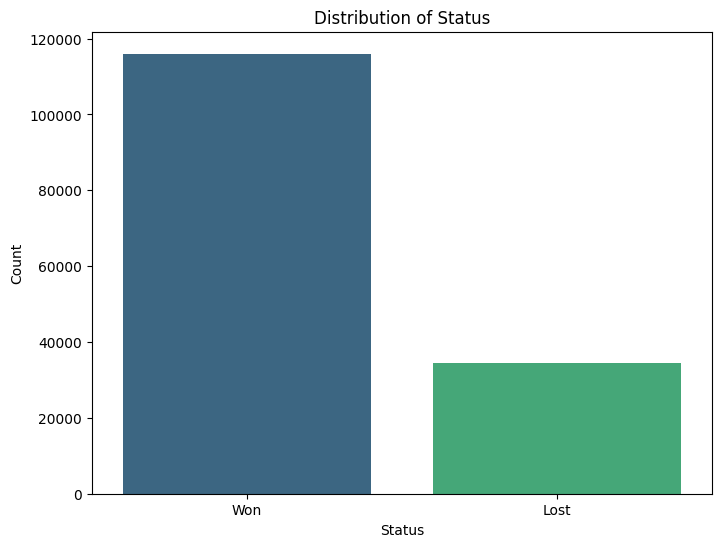

In [39]:
# Plotting the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=data, palette='viridis')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status')
plt.show()

In [40]:
# Convert to datetime
data['item_date'] = pd.to_datetime(data['item_date'])
data['delivery date'] = pd.to_datetime(data['delivery date'])

In [41]:
data['item_date'] = data['item_date'].dt.year
data['delivery date'] = data['delivery date'].dt.year

In [42]:
data = data.drop(['material_ref', 'product_ref', 'customer'], axis=1)

In [49]:
# Encode the target variable
label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])

In [50]:
# Feature and target separation
X = data.drop('status', axis=1)
y = data['status']

In [51]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Create the OneHotEncoder for categorical features
categorical_features = ['item type']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep other features as they are
)


In [57]:
# Create pipelines for each model
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

extra_trees_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier())
])

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])


In [58]:
# Train each model
logistic_pipeline.fit(X_train, y_train)
extra_trees_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)


/Applications/anaconda3/envs/my-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['item type'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=Fa...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [59]:
# Make predictions with each model
logistic_pred = logistic_pipeline.predict(X_test)
extra_trees_pred = extra_trees_pipeline.predict(X_test)
xgb_pred = xgb_pipeline.predict(X_test)

### Evaluate models

In [60]:
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, logistic_pred)}")
print(classification_report(y_test, logistic_pred))
print('-------------------------------------------------------')
print("Extra Trees Classifier:")
print(f"Accuracy: {accuracy_score(y_test, extra_trees_pred)}")
print(classification_report(y_test, extra_trees_pred))
print('-------------------------------------------------------')
print("XGBoost Classifier:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred)}")
print(classification_report(y_test, xgb_pred))

Logistic Regression:
Accuracy: 0.7744101030242605
              precision    recall  f1-score   support

           0       0.60      0.07      0.13      6953
           1       0.78      0.99      0.87     23137

    accuracy                           0.77     30090
   macro avg       0.69      0.53      0.50     30090
weighted avg       0.74      0.77      0.70     30090

-------------------------------------------------------
Extra Trees Classifier:
Accuracy: 0.8914257228315055
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      6953
           1       0.92      0.94      0.93     23137

    accuracy                           0.89     30090
   macro avg       0.86      0.83      0.84     30090
weighted avg       0.89      0.89      0.89     30090

-------------------------------------------------------
XGBoost Classifier:
Accuracy: 0.8608175473579263
              precision    recall  f1-score   support

           0       0.76    

In [62]:
# Save the Extra Trees Classifier model to a pickle file
with open('extra_trees_model.pkl', 'wb') as file:
    pickle.dump(extra_trees_pipeline, file)

print("Extra Trees Classifier model saved as 'extra_trees_model.pkl'.")

Extra Trees Classifier model saved as 'extra_trees_model.pkl'.


In [63]:
with open('extra_trees_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [64]:
new_data = pd.DataFrame({
    'item_date': [2023],
    'quantity tons': [27.74],
    'country': [32],
    'item type': ['W'],
    'application': [4],
    'thickness': [1.1],
    'width': [800],
    'delivery date': [2023],
    'selling_price': [835]
})

# Predict the status using the loaded model
predicted_status = loaded_model.predict(new_data)

if predicted_status == 1:
    print('Status : Won')
else:
    print('Status : Lost')

Status : Won
